In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('newdata.csv')

In [5]:
df_cleaned = df.drop(columns=['Url', 'Country', 'Province', 'Region'])

In [6]:
risk_levels = {'NO_DATA': 'NON_FLOOD_ZONE'}

df['FloodingZone'] = df['FloodingZone'].replace(risk_levels)

df_encoded = pd.get_dummies(df_cleaned, columns=['FloodingZone', 'TypeOfSale'])
df

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale,SubtypeOfProperty_Numerical,TypeOfSale_Numerical,Kitchen_Numerical,StateOfBuilding_Numerical,FloodingZone_Numerical
0,https://www.immoweb.be/en/classified/apartment...,1.0,1.0,1969.000000,Belgium,5,0.0,NON_FLOOD_ZONE,0.0,0.0,...,0.0,1.0,1.0,2,residential_sale,7,0,0,4,0
1,https://www.immoweb.be/en/classified/house/for...,6.0,13.0,1920.000000,Belgium,37,0.0,NON_FLOOD_ZONE,0.0,0.0,...,0.0,0.0,5.0,1,residential_sale,6,0,0,4,0
2,https://www.immoweb.be/en/classified/house/for...,2.0,4.0,2008.000000,Belgium,5,0.0,NON_FLOOD_ZONE,1.0,0.0,...,0.0,0.0,2.0,1,residential_sale,2,0,3,4,1
3,https://www.immoweb.be/en/classified/house/for...,1.0,4.0,1987.240844,Belgium,40,0.0,NON_FLOOD_ZONE,0.0,1.0,...,0.0,1.0,2.0,1,residential_sale,2,0,0,3,0
4,https://www.immoweb.be/en/classified/apartment...,0.0,2.0,1972.000000,Belgium,14,0.0,NON_FLOOD_ZONE,0.0,0.0,...,0.0,1.0,1.0,2,residential_sale,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118695,https://www.immoweb.be/en/classified/house/for...,1.0,3.0,2024.000000,Belgium,12,0.0,NON_FLOOD_ZONE,0.0,1.0,...,0.0,0.0,0.0,1,residential_sale,2,0,0,4,0
118696,https://www.immoweb.be/en/classified/house/for...,4.0,4.0,1987.240844,Belgium,1,0.0,NON_FLOOD_ZONE,0.0,0.0,...,0.0,0.0,0.0,1,residential_sale,6,0,0,6,0
118697,https://www.immoweb.be/en/classified/apartment...,1.0,2.0,1987.240844,Belgium,1,0.0,NON_FLOOD_ZONE,0.0,0.0,...,0.0,1.0,1.0,2,residential_sale,1,0,4,4,1
118698,https://www.immoweb.be/en/classified/apartment...,1.0,2.0,1987.240844,Belgium,5,0.0,POSSIBLE_FLOOD_ZONE,0.0,0.0,...,0.0,1.0,0.0,2,residential_sale,1,0,0,0,2


In [7]:
df.to_csv('newdatalast.csv', index=False) 

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Price', axis=1)  
y = df_encoded['Price']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse , "mea" , mae)


RMSE: 239646.25576271492 mea 69714.37442293965


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error


# create different models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

#  teach them and test
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} RMSE: {rmse}   MEA : {mae}')


RandomForest RMSE: 239646.25576271492   MEA : 69714.37442293965
LinearRegression RMSE: 6668664.239559636   MEA : 208990.0705544431
GradientBoosting RMSE: 278568.5418599403   MEA : 107048.12237945039
SVR RMSE: 457150.9250303294   MEA : 207504.06603894787


In [15]:
from catboost import CatBoostRegressor 
from sklearn.metrics import mean_absolute_error
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mae
print(model.score(X_test, y_test))

Learning rate set to 0.084068
0:	learn: 464223.5193058	total: 67.6ms	remaining: 1m 7s
1:	learn: 449453.2395078	total: 89.6ms	remaining: 44.7s
2:	learn: 433726.0303644	total: 108ms	remaining: 36s
3:	learn: 421305.0072749	total: 126ms	remaining: 31.4s
4:	learn: 409943.2333122	total: 146ms	remaining: 29s
5:	learn: 399969.1508490	total: 164ms	remaining: 27.2s
6:	learn: 389162.7726529	total: 181ms	remaining: 25.7s
7:	learn: 380026.1065085	total: 196ms	remaining: 24.3s
8:	learn: 371652.4867341	total: 216ms	remaining: 23.8s
9:	learn: 363951.7584330	total: 246ms	remaining: 24.3s
10:	learn: 355379.6137520	total: 280ms	remaining: 25.2s
11:	learn: 346862.2160128	total: 319ms	remaining: 26.3s
12:	learn: 341163.5686232	total: 337ms	remaining: 25.6s
13:	learn: 334133.8186976	total: 359ms	remaining: 25.3s
14:	learn: 329145.9246336	total: 377ms	remaining: 24.8s
15:	learn: 324458.8638659	total: 394ms	remaining: 24.2s
16:	learn: 320248.4374221	total: 412ms	remaining: 23.8s
17:	learn: 316798.8755000	tota

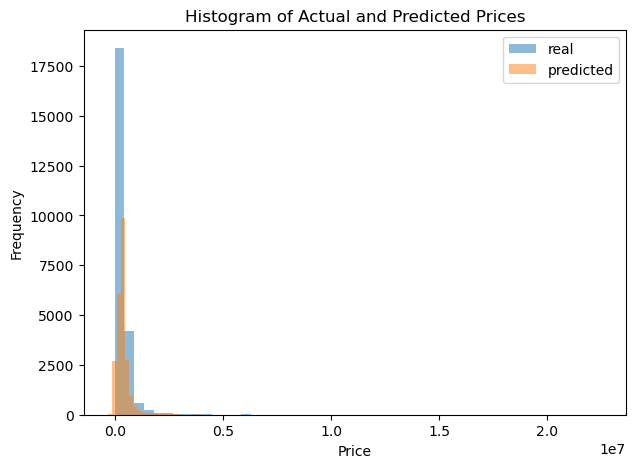

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 5))
plt.hist(y_test, bins=50, alpha=0.5, label='real')
plt.hist(y_pred, bins=50, alpha=0.5, label='predicted')
plt.xlabel("Price")  # x-axis label
plt.ylabel("Frequency")  # y-axis label, frequency shows how many data points fall into each bin
plt.title("Histogram of Actual and Predicted Prices")
plt.legend(loc='upper right')
plt.show()